<a href="https://colab.research.google.com/github/t8101349/Colab-/blob/master/250302_Neurl_MAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

leash_belka_path = kagglehub.competition_download('leash-BELKA')
t8101349_pretrain_path = kagglehub.dataset_download('t8101349/pretrain')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pretrain/pretrained_weights.pt
/kaggle/input/leash-BELKA/sample_submission.csv
/kaggle/input/leash-BELKA/train.parquet
/kaggle/input/leash-BELKA/test.parquet
/kaggle/input/leash-BELKA/train.csv
/kaggle/input/leash-BELKA/test.csv


In [ ]:
# 1. 安裝 PyTorch
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

# 2. 安裝 DGL（選擇適合的 CUDA 版本）
!pip install dgl -f https://data.dgl.ai/wheels/cu121.html

# 3. 安裝 RDKit（用於處理分子）
!pip install rdkit-pypi

# 4. 下載 MAT 的原始碼
!git clone https://github.com/ardigen/MAT.git /kaggle/working/MAT
#%cd MAT



Looking in indexes: https://download.pytorch.org/whl/cu121
Looking in links: https://data.dgl.ai/wheels/cu121.html
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 80.6 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 62.4 MB/s eta 0:00:00:00:0100:01
Cloning into '/kaggle/working/MAT'...
remote: Enumerating objects: 101, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 101 (delta 6), reused 5 (delta 5), pack-reused 90 (from 1)
Receiving objects: 100% (101/101), 413.86 KiB | 12.54 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [ ]:
%%writefile requirements.txt
easydict
future
matplotlib
numpy
opencv-python
scikit-image
scipy
click
requests
tqdm
pyspng
ninja
imageio-ffmpeg==0.4.3
timm
psutil
scikit-learn

Writing requirements.txt


In [ ]:
# 5. 安裝 MAT 依賴
!pip install -r requirements.txt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 40.5 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 kB 12.5 MB/s eta 0:00:00
  Attempting uninstall: imageio-ffmpeg
    Found existing installation: imageio-ffmpeg 0.5.1
    Uninstalling imageio-ffmpeg-0.5.1:
      Successfully uninstalled imageio-ffmpeg-0.5.1


In [ ]:

import pandas as pd

data = {
    "smiles": ["CCO", "C1=CC=CC=C1", "CCN(CC)C(=O)C1=CC=CC=C1"],
    "BRD4": [1, 0, 1],  # 這是可選的標籤數據
    "HSA": [0, 0, 1],
    "sEH": [1, 1, 0],
}
df = pd.DataFrame(data)
# 存成 CSV
df.to_csv("/kaggle/working/example_data.csv", index=False)

print("example_data.csv 已成功建立！")


example_data.csv 已成功建立！


In [ ]:
!pip uninstall -y torch torchvision torchaudio fastai pylibcugraph-cu12 pylibraft-cu12 rmm-cu12 dgl torchdata
!pip uninstall -y torch torchvision torchaudio torchdata triton pytorch-lightning



Found existing installation: torch 2.5.1+cu121
Uninstalling torch-2.5.1+cu121:
  Successfully uninstalled torch-2.5.1+cu121
Found existing installation: torchvision 0.20.1+cu121
Uninstalling torchvision-0.20.1+cu121:
  Successfully uninstalled torchvision-0.20.1+cu121
Found existing installation: torchaudio 2.5.1+cu121
Uninstalling torchaudio-2.5.1+cu121:
  Successfully uninstalled torchaudio-2.5.1+cu121
Found existing installation: fastai 2.7.18
Uninstalling fastai-2.7.18:
  Successfully uninstalled fastai-2.7.18
Found existing installation: pylibcugraph-cu12 24.10.0
Uninstalling pylibcugraph-cu12-24.10.0:
  Successfully uninstalled pylibcugraph-cu12-24.10.0
Found existing installation: pylibraft-cu12 25.2.0
Uninstalling pylibraft-cu12-25.2.0:
  Successfully uninstalled pylibraft-cu12-25.2.0
Found existing installation: rmm-cu12 25.2.0
Uninstalling rmm-cu12-25.2.0:
  Successfully uninstalled rmm-cu12-25.2.0
Found existing installation: dgl 2.1.0
Uninstalling dgl-2.1.0:
  Successfully 

In [ ]:
# 1. 升級 PyTorch 和 torchvision
#!pip install torch==2.1.0 torchvision==0.15.2 torchaudio==2.0.2 torchdata==0.6.1
!pip install torch torchvision torchaudio torchdata --index-url https://download.pytorch.org/whl/cu118
!pip install pytorch-lightning


import torch
print(torch.__version__)  # 目標是 2.1.0



Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 55.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 62.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 2.5 MB/s eta 0:00:00:00:01m0:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 3.9 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 9.5 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 24.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 12.0 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 8.0 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 MB 10.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━

In [ ]:

print(torch.__version__)  # 目標是 2.1.0
!nvcc --version  # 如果已經安裝了CUDA


2.6.0+cu118
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [ ]:
!python --version

Python 3.10.12


In [ ]:
# 3. 檢查安裝是否成功
import torch
import torchdata


print("Torch version:", torch.__version__)
print("Torchdata version:", torchdata.__version__)




Torch version: 2.6.0+cu118
Torchdata version: 0.10.0


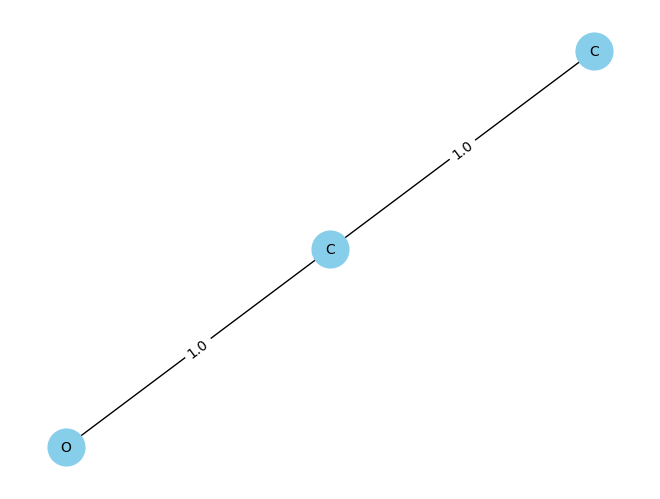

In [ ]:
from rdkit import Chem
from rdkit.Chem import rdmolops
import networkx as nx
import matplotlib.pyplot as plt

def smiles_to_molgraph(smiles):
    # 使用 RDKit 轉換 SMILES 字符串為分子對象
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None

    # 創建空的 NetworkX 圖來表示分子圖
    G = nx.Graph()

    # 添加原子節點到圖中
    for atom in mol.GetAtoms():
        G.add_node(atom.GetIdx(), element=atom.GetSymbol())

    # 添加鍵邊到圖中
    for bond in mol.GetBonds():
        start_idx = bond.GetBeginAtomIdx()
        end_idx = bond.GetEndAtomIdx()
        bond_type = bond.GetBondTypeAsDouble()  # 鍵的類型（單鍵、雙鍵等）
        G.add_edge(start_idx, end_idx, bond_type=bond_type)

    return G

def draw_molgraph(G):
    # 使用 matplotlib 繪製分子圖
    pos = nx.spring_layout(G)  # 使用 spring layout 算法來排布節點
    labels = nx.get_node_attributes(G, 'element')  # 標籤為原子符號

    # 繪製圖形
    nx.draw(G, pos, with_labels=True, labels=labels, node_size=700, node_color='skyblue', font_size=10)
    edge_labels = nx.get_edge_attributes(G, 'bond_type')  # 鍵的類型標籤
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.show()

# 測試：轉換 SMILES 並顯示 MolGraph
smiles = "CCO"
mol_graph = smiles_to_molgraph(smiles)
draw_molgraph(mol_graph)


In [ ]:
from rdkit import Chem
from rdkit.Chem.Pharm2D import Gobbi_Pharm2D, Generate

# 讀取分子
smiles = "O=C(c1ccccc1S(=O)(=O)N2CCN(CC2)c3nnc(s3)C(F)(F)F)"
mol = Chem.MolFromSmiles(smiles)

# 生成 Pharmacophore Fingerprint
fp = Generate.Gen2DFingerprint(mol, Gobbi_Pharm2D.factory)
print(fp)


In [ ]:
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv -f https://data.pyg.org/whl/torch-2.1.0+cu118.html

!pip install torch-geometric

Looking in links: https://data.pyg.org/whl/torch-2.1.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 74.5 MB/s eta 0:00:00:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 21.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 84.8 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.8/887.8 kB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.8 MB/s eta 0:00:0000:01


In [ ]:
import torch
from rdkit import Chem
from torch_geometric.data import Data

def smiles_to_pyg_graph(smiles):
    """將 SMILES 轉換成 PyTorch Geometric 的圖結構"""
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None

    # 原子特徵
    atom_features = [atom.GetAtomicNum() for atom in mol.GetAtoms()]
    x = torch.tensor(atom_features, dtype=torch.float32).view(-1, 1)

    # 建立鍵結（Edge）資訊
    edge_index = []
    for bond in mol.GetBonds():
        i, j = bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()
        edge_index.append([i, j])
        edge_index.append([j, i])  # 雙向邊

    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()

    return Data(x=x, edge_index=edge_index)

# 測試
smiles = "CCO"  # 乙醇
graph = smiles_to_pyg_graph(smiles)
print(graph)


/usr/local/lib/python3.10/dist-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.10/dist-packages/torch_scatter/_version_cuda.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.10/dist-packages/torch_geometric/typing.py:97: UserWarning: An issue occurred while importing 'torch-cluster'. Disabling its usage. Stacktrace: /usr/local/lib/python3.10/dist-packages/torch_cluster/_version_cuda.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-cluster'. "
/usr/local/lib/python3.10/dist-packages/torch_geometric/typing.py:113: UserWarning: An issue occurred while importing 'torch-spline-conv'. Disabling its usage. Stacktrace: /usr/local/lib/python3.10/dist-packages/torch_spline_conv/_version_cuda.so: undefined symbol: _ZN3c1017Registe

Data(x=[3, 1], edge_index=[2, 4])


In [ ]:
import os
import pandas as pd
import torch
%cd MAT/src
#os.chdir('src')
from featurization.data_utils import load_data_from_df, construct_loader

batch_size = 64

# Formal charges are one-hot encoded to keep compatibility with the pre-trained weights.
# If you do not plan to use the pre-trained weights, we recommend to set one_hot_formal_charge to False.
X, y = load_data_from_df('/kaggle/working/MAT/data/freesolv/freesolv.csv', one_hot_formal_charge=True)
data_loader = construct_loader(X, y, batch_size)


pd.read_csv('../data/freesolv/freesolv.csv').head()

/kaggle/working/MAT/src


,smiles,y
0,CN(C)C(=O)c1ccc(cc1)OC,-1.874467
1,CS(=O)(=O)Cl,-0.277514
2,CC(C)C=C,1.465089
3,CCc1cnccn1,-0.428367
4,CCCCCCCO,-0.105855


In [ ]:
from transformer import make_model
d_atom = X[0][0].shape[1]  # It depends on the used featurization.

model_params = {
    'd_atom': d_atom,
    'd_model': 1024,
    'N': 8,
    'h': 16,
    'N_dense': 1,
    'lambda_attention': 0.33,
    'lambda_distance': 0.33,
    'leaky_relu_slope': 0.1,
    'dense_output_nonlinearity': 'relu',
    'distance_matrix_kernel': 'exp',
    'dropout': 0.0,
    'aggregation_type': 'mean'
}

model = make_model(**model_params)

In [ ]:
pretrained_name = '/kaggle/input/pretrain/pretrained_weights.pt'
pretrained_state_dict = torch.load(pretrained_name)
model_state_dict = model.state_dict()
for name, param in pretrained_state_dict.items():
    if 'generator' in name:
         continue
    if isinstance(param, torch.nn.Parameter):
        param = param.data
    model_state_dict[name].copy_(param)

In [ ]:
model.to(torch.device('cuda'))

for batch in data_loader:
    adjacency_matrix, node_features, distance_matrix, y = batch
    batch_mask = torch.sum(torch.abs(node_features), dim=-1) != 0
    output = model(node_features, batch_mask, adjacency_matrix, distance_matrix, None)

    print(output)

/kaggle/working/MAT/src/featurization/data_utils.py:270: UserWarning: The torch.cuda.*DtypeTensor constructors are no longer recommended. It's best to use methods such as torch.tensor(data, dtype=*, device='cuda') to create tensors. (Triggered internally at /pytorch/torch/csrc/tensor/python_tensor.cpp:78.)
  return [FloatTensor(features) for features in (adjacency_list, features_list, distance_list, labels)]
/kaggle/working/MAT/src/featurization/data_utils.py:270: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  return [FloatTensor(features) for features in (adjacency_list, features_list, distance_list, labels)]


tensor([[-2.4051],
        [-1.7210],
        [-2.6658],
        [-2.7834],
        [-3.3124],
        [-2.2270],
        [-0.9334],
        [-2.9410],
        [-2.5840],
        [-2.9793],
        [-3.2283],
        [-2.5585],
        [-2.9503],
        [-2.5413],
        [-1.4790],
        [-2.6938],
        [-2.5343],
        [-3.0700],
        [-1.7521],
        [-2.8508],
        [-2.7233],
        [-2.7745],
        [-1.4555],
        [-2.0842],
        [-2.4641],
        [-2.2478],
        [-2.7510],
        [-2.9244],
        [-2.7238],
        [-0.7718],
        [-2.8122],
        [-2.7351],
        [-3.3129],
        [-1.9302],
        [-1.9331],
        [-2.7941],
        [-0.0988],
        [-2.9912],
        [-2.1983],
        [-2.2464],
        [-2.2204],
        [-2.8957],
        [-3.0902],
        [-2.8692],
        [-1.3732],
        [-0.7021],
        [-3.3444],
        [-2.4148],
        [-2.2097],
        [-1.8821],
        [-2.6916],
        [-2.9209],
        [-1.

In [ ]:
!pip install pyarrow  # 或者你也可以選擇 fastparquet


In [ ]:

#data = pd.read_parquet('/kaggle/input/leash-BELKA/train.parquet')
#test_df = pd.read_parquet('/kaggle/input/leash-BELKA/test.parquet')


In [ ]:
import pandas as pd
import gc  # 引入垃圾回收模組

filename = "/kaggle/input/leash-BELKA/train.csv"
columns_to_read = ["molecule_smiles", "protein_name", "binds"]

batch_size = 60000       # 每次讀取 60,000 筆
target_rows = 3600000    # 每輪儲存 1,200,000 筆
total_batches = 80       # 總共執行 30 次
total_rows = 0           # 記錄當前累積筆數

# 用 chunksize 讀取 CSV
csv_reader = pd.read_csv(filename, usecols=columns_to_read, chunksize=batch_size)

batch_count = 0  # 記錄當前批次數
chunks = []  # 暫存當前批次的資料

for chunk in csv_reader:
    chunks.append(chunk)
    total_rows += len(chunk)

    # 當累積的資料量達到 `target_rows`，就存檔一次
    if total_rows >= target_rows * (batch_count + 1):
        batch_df = pd.concat(chunks, ignore_index=True)

        # **將每 3 列合併成 1 列**
        batch_df["row_idx"] = batch_df.index // 3  # 每 3 列分組
        batch_pivot = batch_df.pivot(index="row_idx", columns="protein_name", values="binds").reset_index()

        # **合併 molecule_smiles**
        smiles_df = batch_df.groupby("row_idx")["molecule_smiles"].first().reset_index()
        final_df = smiles_df.merge(batch_pivot, on="row_idx").drop(columns=["row_idx"])

        # 存成 CSV，每次都存不同的檔案
        output_filename = f"/kaggle/working/sampled_train_part{batch_count+1}.csv"
        final_df.to_csv(output_filename, index=False)

        print(f"✅ 第 {batch_count+1} 次存檔：{len(final_df)} 筆，已累積 {total_rows} 筆")

        # 清理記憶體
        del batch_df, batch_pivot, smiles_df, final_df
        chunks = []  # 清空暫存區
        gc.collect()  # 執行垃圾回收
        batch_count += 1

    if batch_count >= total_batches:
        break  # 達到最大批次數就停止

# 最後如果還有未存的資料，則再存一次
if chunks:
    batch_df = pd.concat(chunks, ignore_index=True)

    batch_df["row_idx"] = batch_df.index // 3
    batch_pivot = batch_df.pivot(index="row_idx", columns="protein_name", values="binds").reset_index()
    smiles_df = batch_df.groupby("row_idx")["molecule_smiles"].first().reset_index()
    final_df = smiles_df.merge(batch_pivot, on="row_idx").drop(columns=["row_idx"])




✅ 第 1 次存檔：1200000 筆，已累積 3600000 筆
✅ 第 2 次存檔：1200000 筆，已累積 7200000 筆
✅ 第 3 次存檔：1200000 筆，已累積 10800000 筆
✅ 第 4 次存檔：1200000 筆，已累積 14400000 筆
✅ 第 5 次存檔：1200000 筆，已累積 18000000 筆
✅ 第 6 次存檔：1200000 筆，已累積 21600000 筆
✅ 第 7 次存檔：1200000 筆，已累積 25200000 筆
✅ 第 8 次存檔：1200000 筆，已累積 28800000 筆
✅ 第 9 次存檔：1200000 筆，已累積 32400000 筆
✅ 第 10 次存檔：1200000 筆，已累積 36000000 筆
✅ 第 11 次存檔：1200000 筆，已累積 39600000 筆
✅ 第 12 次存檔：1200000 筆，已累積 43200000 筆
✅ 第 13 次存檔：1200000 筆，已累積 46800000 筆
✅ 第 14 次存檔：1200000 筆，已累積 50400000 筆
✅ 第 15 次存檔：1200000 筆，已累積 54000000 筆
✅ 第 16 次存檔：1200000 筆，已累積 57600000 筆
✅ 第 17 次存檔：1200000 筆，已累積 61200000 筆
✅ 第 18 次存檔：1200000 筆，已累積 64800000 筆
✅ 第 19 次存檔：1200000 筆，已累積 68400000 筆
✅ 第 20 次存檔：1200000 筆，已累積 72000000 筆
✅ 第 21 次存檔：1200000 筆，已累積 75600000 筆
✅ 第 22 次存檔：1200000 筆，已累積 79200000 筆
✅ 第 23 次存檔：1200000 筆，已累積 82800000 筆
✅ 第 24 次存檔：1200000 筆，已累積 86400000 筆
✅ 第 25 次存檔：1200000 筆，已累積 90000000 筆
✅ 第 26 次存檔：1200000 筆，已累積 93600000 筆
✅ 第 27 次存檔：1200000 筆，已累積 97200000 筆
✅ 第 28 次存檔：1200000 筆，已累積 100800000 筆
✅ 

In [ ]:
data1name = "/kaggle/working/sampled_train_part1.csv"
data1= pd.read_csv(data1name)
data1.head(10)

,molecule_smiles,BRD4,HSA,sEH
0,C#CCOc1ccc(CNc2nc(NCC3CCCN3c3cccnn3)nc(N[C@@H]...,0,0,0
1,C#CCOc1ccc(CNc2nc(NCc3cccc(Br)n3)nc(N[C@@H](CC...,0,0,0
2,C#CCOc1ccc(CNc2nc(NCc3ccc(OCC#C)cc3)nc(N[C@@H]...,0,0,0
3,C#CCOc1ccc(CNc2nc(NCCNC(=O)C(=C)C)nc(N[C@@H](C...,0,0,0
4,C#CCOc1ccc(CNc2nc(NCC(=O)NCC=C)nc(N[C@@H](CC#C...,0,0,0
5,C#CCOc1ccc(CNc2nc(NCC(C)OCC=C)nc(N[C@@H](CC#C)...,0,0,0
6,C#CCOc1ccc(CNc2nc(NCCCOCC=C)nc(N[C@@H](CC#C)CC...,0,0,0
7,C#CCOc1ccc(CNc2nc(NCCOCC=C)nc(N[C@@H](CC#C)CC(...,0,0,0
8,C#CCOc1ccc(CNc2nc(Nc3cnn(C4CCN(C(=O)OC(C)(C)C)...,0,0,0
9,C#CCOc1ccc(CNc2nc(Nc3n[nH]c4c3CN(C(=O)OC(C)(C)...,0,0,0


In [ ]:
data1.shape

(1200000, 4)

In [ ]:
import pandas as pd

def load_data_from_df(file_path, one_hot_formal_charge=True):
    # 讀取 CSV
    df = pd.read_csv(file_path)

    # 定義 X（輸入特徵）和 y（目標變數）
    X = df["molecule_smiles"].tolist()  # SMILES 字串作為輸入
    y = df[["BRD4", "HSA", "sEH"]].values  # 3 欄數值作為輸出

    return X, y


In [ ]:
import pandas as pd
from featurization.data_utils import load_data_from_df

# 讀取 CSV
#df = pd.read_csv('/kaggle/working/sampled_train_part1.csv')

batch_size = 1


# 轉換成 MAT 格式
X, y = load_data_from_df('/kaggle/working/example_data.csv', one_hot_formal_charge=True)
data_loader = construct_loader(X, y, batch_size)

model.to(torch.device('cuda'))

for batch in data_loader:
    adjacency_matrix, node_features, distance_matrix, y = batch
    batch_mask = torch.sum(torch.abs(node_features), dim=-1) != 0
    output = model(node_features, batch_mask, adjacency_matrix, distance_matrix, None)

    print(output)

TypeError: make_model.<locals>.MATModel.forward() takes 2 positional arguments but 6 were given

In [ ]:
STOP

In [ ]:
import torch
import torch.nn as nn

def make_model(d_atom, d_model, N, h, N_dense, lambda_attention, lambda_distance,
               leaky_relu_slope, dense_output_nonlinearity, distance_matrix_kernel,
               dropout, aggregation_type):
    # 假設這部分是你的 MAT 模型結構
    # 這裡包含了 Transformer 層或其他前置層

    class MATModel(nn.Module):
        def __init__(self):
            super(MATModel, self).__init__()
            # Transformer 部分
            self.transformer = nn.Transformer(d_atom, nhead=h, num_encoder_layers=N)

            # 其他層設置（你可以根據模型的設計來調整）
            # 例如，Dense 層
            self.dense = nn.Linear(d_atom, d_model)
            self.fc = nn.Linear(d_model, 3)  # 假設最後需要3個輸出（binds_BRD4, binds_HSA, binds_sEH）

            # 激活函數
            self.sigmoid = nn.Sigmoid()

        def forward(self, x):
            # Transformer 層
            x = self.transformer(x)

            # Dense 層
            x = self.dense(x)

            # 全連接層
            x = self.fc(x)

            # Sigmoid 激活
            x = self.sigmoid(x)  # 多標籤分類
            return x

    return MATModel()


In [ ]:
model_params = {
    'd_atom': d_atom,
    'd_model': 1024,
    'N': 8,
    'h': 4,
    'N_dense': 2,
    'lambda_attention': 0.33,
    'lambda_distance': 0.33,
    'leaky_relu_slope': 0.1,
    'dense_output_nonlinearity': 'relu',
    'distance_matrix_kernel': 'exp',
    'dropout': 0.0,
    'aggregation_type': 'mean'
}

model = make_model(**model_params)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


In [ ]:
import os
import pandas as pd
import torch
from featurization.data_utils import load_data_from_df, construct_loader

# 設定 CUDA
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# 參數設定
batch_size = 128
num_echoes = 1  # 每個檔案跑 10 輪

# 取得所有檔案列表
file_dir = "/kaggle/working"
file_pattern = "sampled_train_part{}.csv"
file_list = [file_pattern.format(i) for i in range(1, 81)]  # 1 到 80

# 開始處理每個檔案
for file_idx, file_name in enumerate(file_list, start=1):
    file_path = os.path.join(file_dir, file_name)

    if not os.path.exists(file_path):
        print(f"⚠️ 檔案 {file_name} 不存在，跳過")
        continue

    print(f"🚀 正在處理：{file_name} ({file_idx}/80)")

    # 讀取 CSV 並轉換為 data loader
    X, y = load_data_from_df(file_path, one_hot_formal_charge=True)
    data_loader = construct_loader(X, y, batch_size)

    # 進行 10 輪 Echo
    for echo in range(num_echoes):
        print(f"🔁 Echo {echo + 1}/{num_echoes} 開始...")

        for batch in data_loader:
            adjacency_matrix, node_features, distance_matrix, y = batch

            # 移動到 GPU（如果可用）
            adjacency_matrix = adjacency_matrix.to(device)
            node_features = node_features.to(device)
            distance_matrix = distance_matrix.to(device)
            y = y.to(device)

            batch_mask = torch.sum(torch.abs(node_features), dim=-1) != 0
            output = model(node_features, batch_mask, adjacency_matrix, distance_matrix, None)

            print(f"✅ Echo {echo + 1}, 檔案 {file_name}, Batch size: {len(y)}, 輸出範例: {output[:3]}")

        print(f"🔄 Echo {echo + 1}/{num_echoes} 完成！")

    print(f"🎯 檔案 {file_name} 處理完成！\n")

print("🎉 所有檔案處理完畢！")


In [ ]:
只要smiles轉graph
graph = x
x->mat
fp
bind = y
model.fit(fp,y)

In [ ]:
import pyarrow.parquet as pq
import pandas as pd
import gc  # 引入垃圾回收模組

filename = "/kaggle/input/leash-BELKA/train.parquet"
columns_to_read = ["molecule_smiles", "protein_name", "binds"]

batch_size = 60000    # 每次讀取 60,000 筆
target_rows = 12000000  # 每輪儲存 1,200,0000 筆
total_batches = 30    # 總共執行 30 次
total_rows = 0        # 記錄當前累積筆數

parquet_file = pq.ParquetFile(filename)

# 獲取總行組數量
num_row_groups = parquet_file.num_row_groups
print(f"Total row groups in file: {num_row_groups}")

# 計算每次讀取多少行組
row_groups_per_batch = target_rows // batch_size


# 開始進行批次處理
for i in range(total_batches):
    chunks = []
    current_rows = 0  # 每輪的計數器
    batch_start_row_group = i * row_groups_per_batch  # 直接依序取
    batch_end_row_group = min(batch_start_row_group + row_groups_per_batch, num_row_groups)

    if batch_end_row_group >= num_row_groups:
        batch_end_row_group = num_row_groups  # 避免超出行組範圍

    print(f"✅ 第 {i+1} 次處理：從行組 {batch_start_row_group} 到行組 {batch_end_row_group}")

    # 使用 pyarrow 的 ParquetFile 直接讀取指定範圍的行組
    for row_group_idx in range(batch_start_row_group, batch_end_row_group):
        try:
            batch = parquet_file.read_row_groups([row_group_idx], columns=columns_to_read)
            chunk = batch.to_pandas()

            # 檢查是否有資料
            if not chunk.empty:
                chunks.append(chunk)
                current_rows += len(chunk)
                total_rows += len(chunk)

            # 如果讀取到指定範圍的資料，就停止
            if total_rows >= target_rows * (i + 1):
                break  # 如果已經讀到該批次的結尾就停止

        except Exception as e:
            print(f"⚠️ 讀取行組 {row_group_idx} 時發生錯誤: {e}")

    if chunks:  # 確保有資料才進行合併
        # 合併 DataFrame
        batch_df = pd.concat(chunks, ignore_index=True)

        # **將每 3 列合併成 1 列**
        batch_df["row_idx"] = batch_df.index // 3  # 每 3 列分組
        batch_pivot = batch_df.pivot(index="row_idx", columns="protein_name", values="binds").reset_index()

        # **合併 molecule_smiles**
        smiles_df = batch_df.groupby("row_idx")["molecule_smiles"].first().reset_index()
        final_df = smiles_df.merge(batch_pivot, on="row_idx").drop(columns=["row_idx"])

        # 存成 parquet，每次都存不同的檔案
        output_filename = f"/kaggle/working/sampled_train_part{i+1}.parquet"
        final_df.to_parquet(output_filename, index=False)

        print(f"✅ 第 {i+1} 次存檔：{len(final_df)} 筆，已累積 {total_rows} 筆")

        # 清理無用的變數，釋放記憶體
        del batch_df, batch_pivot, smiles_df, final_df
        gc.collect()  # 執行垃圾回收
    else:
        print(f"⚠️ 第 {i+1} 次處理未讀取到任何資料，跳過該批次。")


In [ ]:

import pyarrow.parquet as pq
import pandas as pd
import gc  # 引入垃圾回收模組

filename = "/kaggle/input/leash-BELKA/train.parquet"
columns_to_read = ["molecule_smiles", "protein_name", "binds"]

batch_size = 60000       # 每次讀取 60,000 筆
target_rows = 12000000   # 每輪儲存 12,000,000 筆
total_batches = 30       # 總共執行 30 次
total_rows = 0           # 記錄當前累積筆數

parquet_file = pq.ParquetFile(filename)

# 獲取總行組數量
num_row_groups = parquet_file.num_row_groups
print(f"Total row groups in file: {num_row_groups}")

# 計算每次讀取多少行組
row_groups_per_batch = target_rows // batch_size  # 計算每次應該讀取多少個行組

# 開始進行批次處理
for i in range(total_batches):
    chunks = []
    current_rows = 0  # 每輪的計數器
    batch_start_row_group = total_rows // batch_size  # 計算起始行組索引
    batch_end_row_group = batch_start_row_group + row_groups_per_batch  # 計算結束行組索引

    # 確保不超過行組數量
    if batch_end_row_group >= num_row_groups:
        batch_end_row_group = num_row_groups

    print(f"✅ 第 {i+1} 次處理：從行組 {batch_start_row_group} 到行組 {batch_end_row_group}")

    # 依序讀取行組
    for row_group_idx in range(batch_start_row_group, batch_end_row_group):
        try:
            batch = parquet_file.read_row_groups([row_group_idx], columns=columns_to_read)
            chunk = batch.to_pandas()

            # 確保有資料才加入
            if not chunk.empty:
                chunks.append(chunk)
                current_rows += len(chunk)
                total_rows += len(chunk)

            # 若本批次已達到 `target_rows`，則停止
            if total_rows >= target_rows * (i + 1):
                break

        except Exception as e:
            print(f"⚠️ 讀取行組 {row_group_idx} 時發生錯誤: {e}")

    if chunks:  # 確保有資料才進行合併
        # 合併 DataFrame
        batch_df = pd.concat(chunks, ignore_index=True)

        # **將每 3 列合併成 1 列**
        batch_df["row_idx"] = batch_df.index // 3  # 每 3 列分組
        batch_pivot = batch_df.pivot(index="row_idx", columns="protein_name", values="binds").reset_index()

        # **合併 molecule_smiles**
        smiles_df = batch_df.groupby("row_idx")["molecule_smiles"].first().reset_index()
        final_df = smiles_df.merge(batch_pivot, on="row_idx").drop(columns=["row_idx"])

        # 存成 parquet，每次都存不同的檔案
        output_filename = f"/kaggle/working/sampled_train_part{i+1}.parquet"
        final_df.to_parquet(output_filename, index=False)

        print(f"✅ 第 {i+1} 次存檔：{len(final_df)} 筆，已累積 {total_rows} 筆")

        # 清理記憶體
        del batch_df, batch_pivot, smiles_df, final_df
        gc.collect()  # 執行垃圾回收
    else:
        print(f"⚠️ 第 {i+1} 次處理未讀取到任何資料，跳過該批次。")


In [ ]:
data1name = "/kaggle/working/sampled_train_part1.parquet"
data1= pd.read_parquet(data1name)
data1.head(10)

In [ ]:
data1.shape

In [ ]:
data2name = "/kaggle/working/sampled_train_part2.parquet"
data2= pd.read_parquet(data2name)
data2.head(10)

In [ ]:
data2.shape

In [ ]:
filename = "/kaggle/input/leash-BELKA/train.parquet"
data3= pd.read_parquet(filename)
data3.shape

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import rdmolops
import torch
from torch_geometric.data import Data

# 定義將 SMILES 轉換為圖結構的函數
def smiles_to_pyg_graph(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        # 生成分子圖
        atoms = [atom.GetAtomicNum() for atom in mol.GetAtoms()]
        bonds = [(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()) for bond in mol.GetBonds()]

        # 創建邊列表
        edge_index = torch.tensor(bonds, dtype=torch.long).t().contiguous()

        # 創建特徵矩陣
        x = torch.tensor(atoms, dtype=torch.float).view(-1, 1)  # 每個原子的特徵

        # 創建 PyG 格式的數據對象
        data = Data(x=x, edge_index=edge_index)

        return data
    else:
        return None

# 設定讀取 Parquet 文件的參數
filename = '/kaggle/input/leash-BELKA/train.parquet'
chunk_size = 100000  # 每次讀取的行數
nrows = 500000  # 需要處理的總行數

# 讀取並處理每一個 chunk
chunks = []
for chunk in pd.read_parquet(filename, chunksize=chunk_size, usecols=['molecule_smiles', 'protein', 'bind'], nrows=nrows):
    # 將 molecule_smiles 轉換為圖結構
    chunk['pyg_graph'] = chunk['molecule_smiles'].apply(smiles_to_pyg_graph)
    chunks.append(chunk)

# 合併所有的 chunks 以形成最終的 DataFrame
train_df = pd.concat(chunks, ignore_index=True)

# 顯示合併後的 DataFrame
print(train_df[['molecule_smiles', 'protein', 'bind', 'pyg_graph']].head())


In [ ]:
只要smiles轉graph
graph = x
x->mat
fp
bind = y
model.fit(fp,y)

In [ ]:
batch_size = 64

# Formal charges are one-hot encoded to keep compatibility with the pre-trained weights.
# If you do not plan to use the pre-trained weights, we recommend to set one_hot_formal_charge to False.
X, y = train_df
data_loader = construct_loader(X, y, batch_size)

In [ ]:
model.to(torch.device('cuda'))

for batch in data_loader:
    adjacency_matrix, node_features, distance_matrix, y = batch
    batch_mask = torch.sum(torch.abs(node_features), dim=-1) != 0
    output = model(node_features, batch_mask, adjacency_matrix, distance_matrix, None)

    print(output)

In [ ]:
#測試

class GNNFingerprint(nn.Module):
    def __init__(self, in_dim=1, hidden_dim=64, out_dim=128, num_layers=3):
        super(GNNFingerprint, self).__init__()
        self.conv_layers = nn.ModuleList([GCNConv(in_dim if i == 0 else hidden_dim, hidden_dim) for i in range(num_layers)])
        self.fc = nn.Linear(hidden_dim, out_dim)  # 最終輸出分子指紋

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        for conv in self.conv_layers:
            x = F.relu(conv(x, edge_index))
        x = global_mean_pool(x, data.batch)  # 聚合成全局分子指紋
        return self.fc(x)

# 測試 GNN 指紋模型
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = GNNFingerprint().to(device)
graph = graph.to(device)

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Pharm2D import Gobbi_Pharm2D, Generate

# 定義一個將 SMILES 轉換為 Pharmacophore Fingerprint 的函數
def smiles_to_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        fp = Generate.Gen2DFingerprint(mol, Gobbi_Pharm2D.factory)
        return fp
    else:
        return None

# 設定讀取 Parquet 文件的參數
filename = '/kaggle/input/leash-BELKA/train.parquet'
chunk_size = 100000  # 每次讀取的行數
nrows = 500000  # 需要處理的總行數

# 讀取並處理每一個 chunk
chunks = []
for chunk in pd.read_parquet(filename, chunksize=chunk_size, nrows=nrows):
    chunk['pyg_graph'] = chunk['molecule_smiles'].apply(smiles_to_pyg_graph)
    chunks.append(chunk)

# 合併所有的 chunks 以形成最終的 DataFrame
train_df = pd.concat(chunks, ignore_index=True)

# 顯示合併後的 DataFrame
print(train_df.head())


In [ ]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from convert_smiles_to_graph import smiles_to_graph

class MolecularDataset(Dataset):
    def __init__(self, csv_file):
        self.data = pd.read_csv(csv_file)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        smiles = self.data.iloc[idx]["SMILES"]
        label = torch.tensor(self.data.iloc[idx]["Property"], dtype=torch.float32)
        graph = smiles_to_graph(smiles)

        return graph, label

# 建立 DataLoader
def get_data_loader(csv_file, batch_size=32):
    dataset = MolecularDataset(csv_file)
    return DataLoader(dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)

# 設定批量處理函數
def collate_fn(batch):
    graphs, labels = zip(*batch)
    graphs = dgl.batch(graphs)
    labels = torch.stack(labels)
    return graphs, labels


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from models import MAT
from dataset import get_data_loader

# 設定 GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1. 載入 MAT 模型
model = MAT()
model.load_state_dict(torch.load("pretrained/mat.pth", map_location=device))  # 載入預訓練模型
model.to(device)

# 2. 設定損失函數和優化器
criterion = nn.MSELoss()  # 均方誤差（適用於回歸）
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# 3. 讀取數據集
train_loader = get_data_loader("data/custom_dataset.csv", batch_size=16)

# 4. 訓練模型
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for graphs, labels in train_loader:
        graphs, labels = graphs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(graphs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss:.4f}")

# 5. 儲存微調後的模型
torch.save(model.state_dict(), "fine_tuned_mat.pth")
print("微調完成，模型已保存！")
